In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Просмотреть выборку Rost на экране;

In [12]:
data = pd.read_csv("ds1.csv", index_col=False, sep='\t')
data

,Height,FootSize,Weight,Sex
0,173,39,70,0
1,164,38,47,0
2,170,38,53,0
3,180,42,62,1
4,187,44,90,1
5,173,41,63,1
6,186,44,80,1
7,160,37,49,0
8,160,36,54,0
9,168,38,49,0


2) произвести интервальную группировку данных (построить интервальные
вариационные ряды частот, частостей, накопленных частот и накоплен-
ных частостей); построить гистограмму, полигон и кумуляту частостей;

можно, ли глядя на гистограмму, предположить, что рост имеет нормаль-
ное распределение? Постройте гистограммы для размера обуви и веса,
что можно сказать об их нормальности? Какова может быть причина от-
сутствия нормальности в наших данных? Как исправить ситуацию, учи-
тывая пол?

In [85]:
def get_series(ser: pd.Series):
    answer = pd.DataFrame()
    answer['frequency'] = ser.value_counts().sort_index()
    answer['relative_frequency'] = answer['frequency']/len(ser)
    answer['cum_frequency'] = answer['frequency'].cumsum()
    answer['cum_relative_frequency'] = answer['relative_frequency'].cumsum()
    return answer

def get_relative_frequencies(ser: pd.Series):
    return ser.value_counts().sort_index()/len(ser)

def show_graphs(ser: pd.Series):
    rel_freq = get_relative_frequencies(ser)
    rel_freq.plot('bar')
    plt.show()
    rel_freq.plot()
    plt.show()
    cum_rel_freq = rel_freq.cumsum()
    cum_rel_freq.plot()
    plt.show()


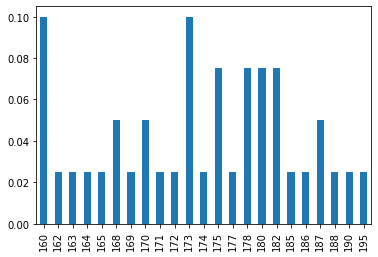

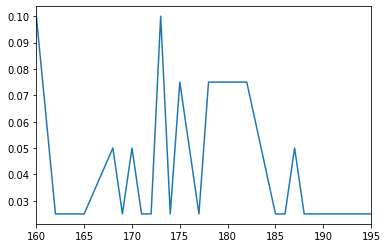

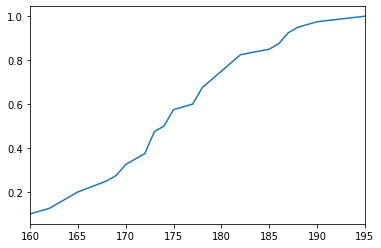

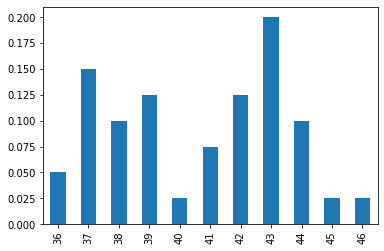

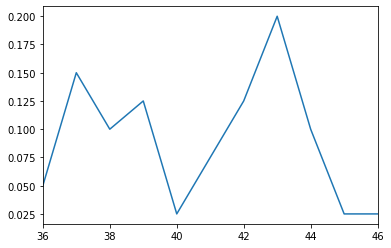

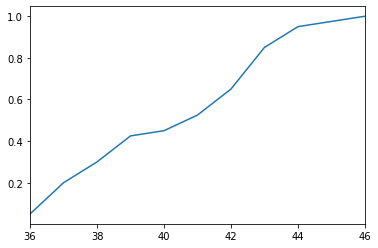

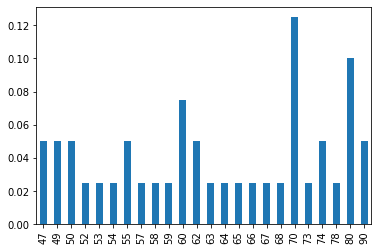

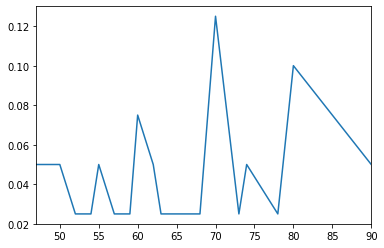

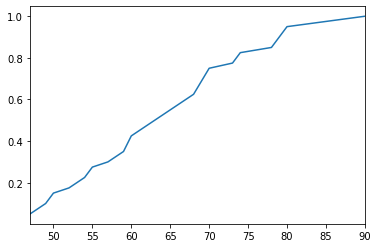

In [86]:
show_graphs(data['Height'])
show_graphs(data['FootSize'])
show_graphs(data['Weight'])

3) вычислить выборочные числовые характеристики: среднее, моду, медиа-
ну, размах, дисперсию, стандартное отклонение, стандартную асиммет-
рию, стандартный эксцесс. 


Каковы должны быть асимметрия и эксцесс,
если рост имеет нормальное распределение?

Оба нулевые.

4) вывести на экран все выборочные характеристики о росте, размере обуви
и весе одновременно. Где больше разброс: в росте весе или размере? По-
чему?

Больше всего в весе


In [74]:
def describe_df(df: pd.DataFrame):
    answer = df.describe()
    answer = answer.append(pd.Series(df.max() - df.min(), name='range'))
    answer = answer.append(pd.Series(df.skew(), name='skew'))
    answer = answer.append(pd.Series(df.mode().iloc[0], name='mode'))
    answer = answer.append(pd.Series(df.kurtosis(), name='kurtosis'))
    return answer
describe_df(data)

,Height,FootSize,Weight,Sex
count,40.000000,40.000000,40.000000,40.000000
mean,174.700000,40.625000,64.525000,0.600000
std,9.075750,2.825593,11.509166,0.496139
min,160.000000,36.000000,47.000000,0.000000
25%,168.750000,38.000000,55.000000,0.000000
50%,174.500000,41.000000,63.500000,1.000000
75%,180.500000,43.000000,70.750000,1.000000
max,195.000000,46.000000,90.000000,1.000000
range,35.000000,10.000000,43.000000,1.000000
skew,0.097925,-0.077281,0.381933,-0.424329


5) Проделать этот же анализ для девочек и мальчиков по отдельности.

In [81]:
males = data[data['Sex'] == 1]
females = data[data['Sex'] != 1]

In [82]:
describe_df(males)

,Height,FootSize,Weight,Sex
count,24.000000,24.000000,24.000000,24.0
mean,180.250000,42.625000,71.166667,1.0
std,6.340004,1.555146,8.932922,0.0
min,171.000000,39.000000,60.000000,1.0
25%,175.000000,42.000000,63.750000,1.0
50%,180.000000,43.000000,70.000000,1.0
75%,185.250000,43.250000,78.500000,1.0
max,195.000000,46.000000,90.000000,1.0
range,24.000000,7.000000,30.000000,0.0
skew,0.502942,-0.216356,0.625886,0.0


In [83]:
describe_df(females)

,Height,FootSize,Weight,Sex
count,16.000000,16.000000,16.000000,16.0
mean,166.375000,37.625000,54.562500,0.0
std,5.414487,1.024695,6.752469,0.0
min,160.000000,36.000000,47.000000,0.0
25%,161.500000,37.000000,49.750000,0.0
50%,166.500000,37.500000,53.500000,0.0
75%,170.000000,38.250000,57.250000,0.0
max,177.000000,39.000000,70.000000,0.0
range,17.000000,3.000000,23.000000,0.0
skew,0.349640,0.039833,1.194761,0.0


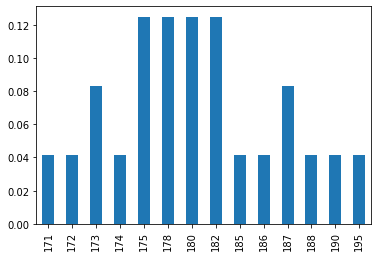

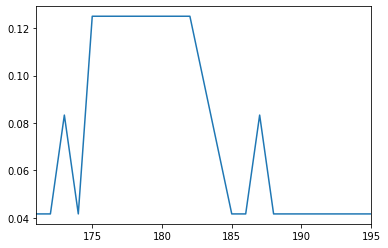

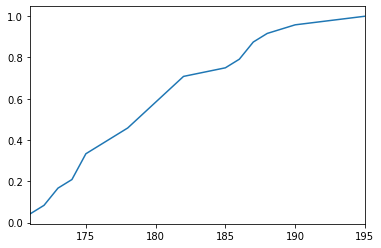

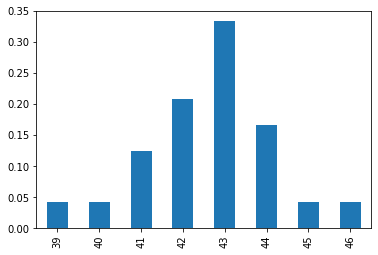

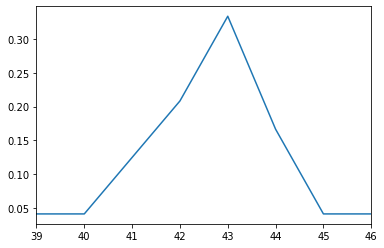

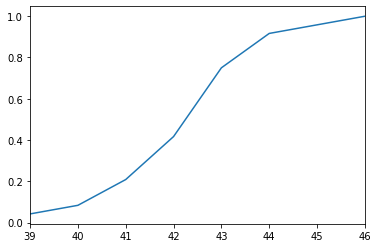

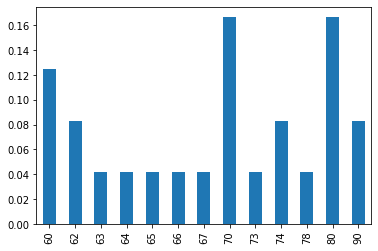

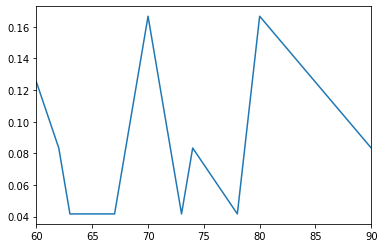

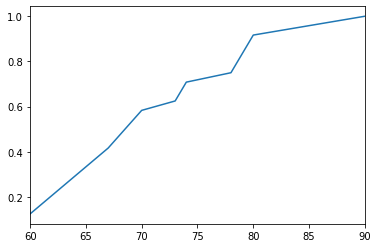

In [87]:
show_graphs(males['Height'])
show_graphs(males['FootSize'])
show_graphs(males['Weight'])

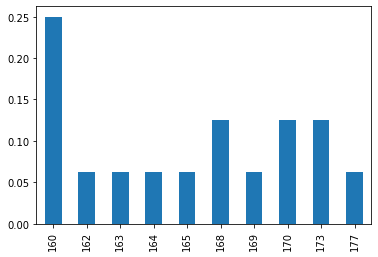

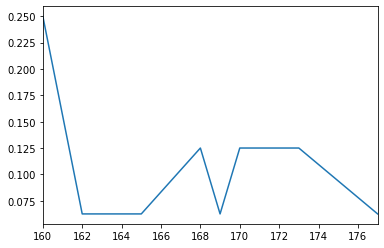

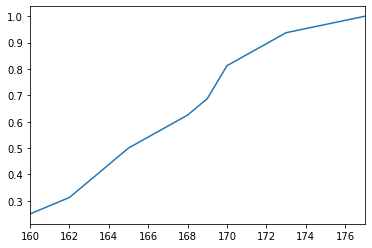

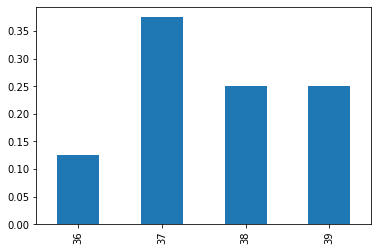

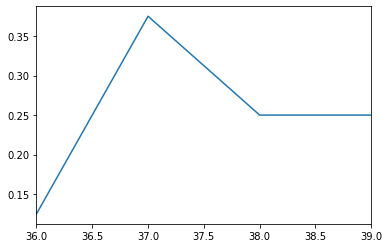

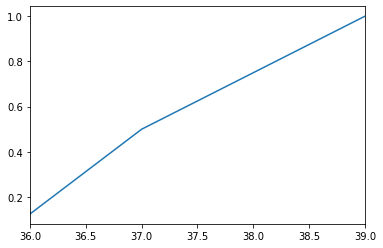

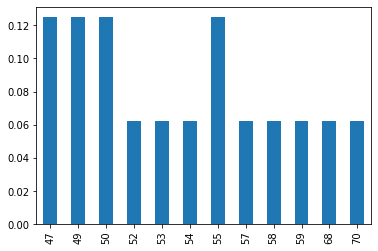

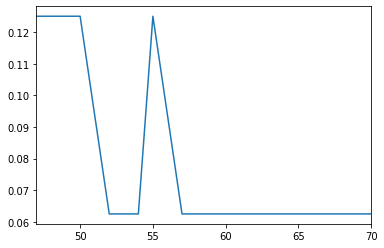

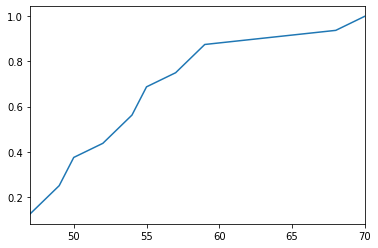

In [88]:
show_graphs(females['Height'])
show_graphs(females['FootSize'])
show_graphs(females['Weight'])

ВОПРОСЫ
1. Как записывается выборочное среднее для не сгруппированных данных?

2. Как записывается несмещенная выборочная дисперсия для не сгруппироанных данных?
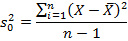Где X с чертой - это выборочное среднее

3. Что такое (выборочная) мода (можно на примере).
Мода всех значений выборки - множество значений, которые встречаются в выборке наибольшее число раз.

4. Что такое (выборочная) медиана (можно на примере).

Медиана выборки - значение, такое что половина выборки больше или равна, а половина - меньше или равна этого значения. Медиан может быть бесконечно много, например для выборки [1,2] любое число между 1 и 2 - это медиана.

5. Что характеризуют асимметрия и эксцесс?

Ассиметрия показывает симметричность выборки (третий центральный момент)

Эксцесс показывает "ширину" распределения. Если распределение (его график) узкий и высокий, эксцесс положителен.
Если распределение низкое и широкое (с длинными хвостами), то эксцесс отрицителен. У нормального распределения он равен 0. Эксцесс можно найти как 4 центральный момент.

6. Для чего используется коэффициент вариации?
Он показывает, насколько далеко значения в выборке могут отходить от среднего

7. Что вы понимаете под репрезентативностью выборки?
То, насколько статистические характеристики выборки совпадают с характеристиками множества, из которого эта выборка получена.

8.Что такое гистограмма частостей, статистическим аналогом чего она явля-
ется?

Это график нормализованного распределения для данной выборки

9.Что такое кумулята частостей, статистическим аналогом чего она являет-
ся?

Это график функции распределения для данной выборки

10.Как записывается выборочное среднее для сгруппированных данных?
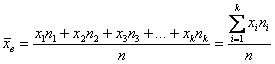